In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import json
import matplotlib.pyplot as plt

import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

pd.set_option('display.max_columns', 500)

In [3]:
data_storage_directory = "F:\\nma\Project\\dataset\\tmp" # Note: this path must exist on your local drive
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [ ]:
session_table = cache.get_ophys_session_table()
experiment_table = cache.get_ophys_experiment_table()

In [20]:
exp_ids =  [880375092,848697604,950833329, 948507789, 938003662, 1050406399]
ophys_experiment_id = exp_ids[1]
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

In [ ]:
ts = ophys_experiment.trials['start_time']
#596 
ophys_experiment.stimulus_presentations


In [21]:
def get_processed_timestamps(experiment,t_before=2.0,t_after=2.0,output_sampling_rate=30) -> None:
    '''
    gives the preprocessed neuronal and behaviour data.
    experiment: actual loaded [ophys_experiment]
    t_before: time before stimulus in seconds
    t_after: time after stimulus in seconds
    output_sampling_rate: sampling rate for output
    Returns:
    metadata: 
        dictionary containing :
        'ophys_experiment_id'
        'ophys_session_id'
        'targeted_structure'
        'imaging_depth'
        'equipment_name'
        'cre_line'
        'mouse_id'
        'sex'
    neuronal_data:
        
    running_data
    '''
    tidy_output = ophys.build_tidy_cell_df(experiment)
    exp_id = experiment.ophys_experiment_id
    stimulus_table_with_change = ophys_experiment.stimulus_presentations.query('is_change')
    # stimulus_table_without_change = ophys_experiment.stimulus_presentations.query('is_change == False')
    # metadata_keys = [
    #     'ophys_experiment_id',
    #     'ophys_session_id',
    #     'targeted_structure',
    #     'imaging_depth',
    #     'equipment_name',
    #     'cre_line',
    #     'mouse_id',
    #     'sex',
    # ]
    # metadata = {}
    # for metadata_key in metadata_keys:
    #     metadata[metadata_key] = str(experiment.metadata[metadata_key])
    
    cells = tidy_output['cell_specimen_id'].unique()
    # print('saving metadata')
    # with open(data_storage_directory+f'\\processed\\metadata_{exp_id}.json','w') as f:
    #     json.dump(metadata,f)
    # print('done')
    
    # print('building running data with change')
    # running_data = mindscope_utilities.event_triggered_response(
    #     data = experiment.running_speed,
    #     t = 'timestamps',
    #     y = 'speed',
    #     event_times = stimulus_table_with_change['start_time'],
    #     t_before=t_before,
    #     t_after=t_after,
    #     output_sampling_rate = output_sampling_rate,
    # )
    # print('saving running data')
    # running_data.to_csv(data_storage_directory+f'\\processed\\running_data_with_change{exp_id}.csv')
    # del running_data
    # print('building running data wihtout change')
    # running_data = mindscope_utilities.event_triggered_response(
    #     data = experiment.running_speed,
    #     t = 'timestamps',
    #     y = 'speed',
    #     event_times = stimulus_table_without_change['start_time'],
    #     t_before=t_before,
    #     t_after=t_after,
    #     output_sampling_rate = output_sampling_rate,
    # )
    # print('saving running data')
    # running_data.to_csv(data_storage_directory+f'\\processed\\running_data_without_change{exp_id}.csv')
    # del running_data
    # # del experiment.running_speed

    print('building neuronal data change')
    neuronal_data = []
    for cell_id in tqdm(cells):
        etr = mindscope_utilities.event_triggered_response(
        data = tidy_output.query('cell_specimen_id == @cell_id'),
            t = 'timestamps',
            y = 'dff',
            event_times = stimulus_table_with_change['start_time'],
            t_before=t_before,
            t_after=t_after,
            output_sampling_rate = output_sampling_rate,
        )
        neuronal_data.append(etr)
        etr['cell_specimen_id'] = cell_id
    neuronal_data = pd.concat(neuronal_data)
    print('saving neuronal_data_with_change data')
    neuronal_data.to_csv(data_storage_directory+f'\\processed\\neuronal_data_with_change_{exp_id}.csv')
    del neuronal_data


    # print('building neuronal data no change')
    # neuronal_data = []
    # for cell_id in tqdm(cells):
    #     etr = mindscope_utilities.event_triggered_response(
    #     data = tidy_output.query('cell_specimen_id == @cell_id'),
    #         t = 'timestamps',
    #         y = 'dff',
    #         event_times = stimulus_table_without_change['start_time'],
    #         t_before=t_before,
    #         t_after=t_after,
    #         output_sampling_rate = output_sampling_rate,
    #     )
    #     etr['cell_specimen_id'] = cell_id
    #     neuronal_data.append(etr)
    # neuronal_data = pd.concat(neuronal_data)
    # print('saving neuronal_data_without_change data')
    # neuronal_data.to_csv(data_storage_directory+f'\\processed\\neuronal_data_without_change_{exp_id}.csv')
    # del neuronal_data



In [22]:
get_processed_timestamps(ophys_experiment)

building neuronal data change


100%|██████████| 188/188 [03:25<00:00,  1.09s/it]


saving neuronal_data_with_change data


In [ ]:
del ophys_experiment

In [23]:
exp_ids =  [880375092,848697604,950833329, 948507789, 938003662, 1050406399]
ophys_experiment_id = exp_ids[1]
# neuronal_data_no_change = pd.read_csv(data_storage_directory + f'\\processed\\neuronal_data_without_change_{ophys_experiment_id}.csv')
neuronal_data_change = pd.read_csv(data_storage_directory + f'\\processed\\neuronal_data_with_change_{ophys_experiment_id}.csv')
# running_data_no_change = pd.read_csv(data_storage_directory + f'\\processed\\running_data_without_change{ophys_experiment_id}.csv')
# running_data_change = pd.read_csv(data_storage_directory + f'\\processed\\running_data_with_change{ophys_experiment_id}.csv')

In [58]:
cells = neuronal_data_change['cell_specimen_id'].unique()[:10]

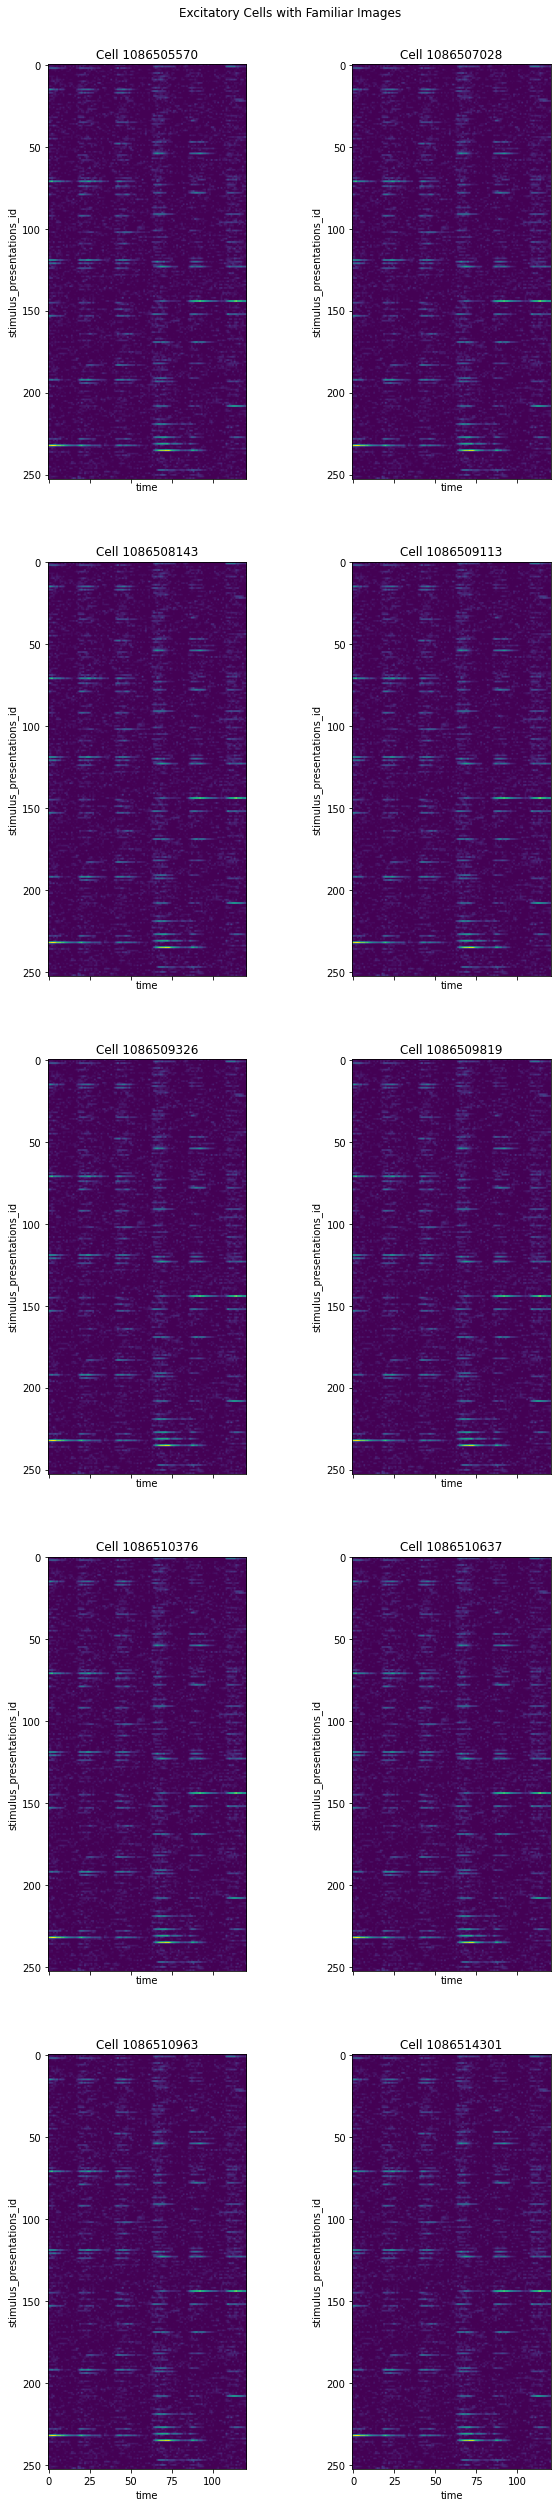

In [88]:
cell_id = 1086505772
d = neuronal_data_change.query('cell_specimen_id == @cell_id')
f,a = plt.subplots(5,2,sharex=True,figsize=(10,40))
f.suptitle('Excitatory Cells with Familiar Images')
for i,c in enumerate(cells):
    a[i//2,i%2].set_xlabel('time')
    a[i//2,i%2].set_ylabel('stimulus_presentations_id')
    a[i//2,i%2].set_title(f'Cell {c}')
    img = []
    for n,g in d.groupby('stimulus_presentations_id'):
        img.append(g['dff'])
    img = np.stack(img)
    img = np.clip(img,0,None)
    a[i//2,i%2].imshow(img)
plt.subplots_adjust(top=0.96)
plt.show()



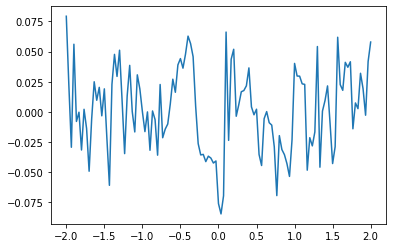

In [43]:
plt.plot(d.query('stimulus_presentations_id == 8')['time'],d.query('stimulus_presentations_id == 8')['dff'])

In [31]:
running_data_change = pd.read_csv(data_storage_directory + f'\\processed\\running_data_with_change{ophys_experiment_id}.csv')
running_data_change

,Unnamed: 0,time,speed,event_number,stimulus_presentations_id,event_time
0,0,-2.000000,0.088982,0,8,311.75002
1,1,-1.966667,0.128246,0,8,311.75002
2,2,-1.933333,0.166919,0,8,311.75002
3,3,-1.900000,0.151153,0,8,311.75002
4,4,-1.866667,0.086095,0,8,311.75002
...,...,...,...,...,...,...
30608,30608,1.866667,2.265666,252,4802,3910.18608
30609,30609,1.900000,-0.883491,252,4802,3910.18608
30610,30610,1.933333,-3.853935,252,4802,3910.18608
30611,30611,1.966667,-6.057372,252,4802,3910.18608


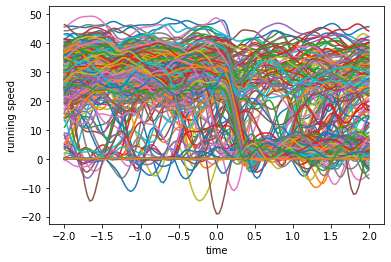

In [33]:
plt.figure()
plt.xlabel('time')
plt.ylabel('running speed')
for n,g in running_data_change.groupby('stimulus_presentations_id'):
    plt.plot(g['time'], g['speed'])
plt.show()